import Packages

In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import pickle

## AHP

### Intensity of Importance

| Scale | Definition |
| --- | --- |
| 1 | Equal importance |
| 3 | Moderate importance of one over another |
| 5 | Strong importance of one over another |
| 7 | Very strong importance of one over another |
| 9 | Extreme importance of one over another |

### Comparison of Intensity

| Scale | Definition |
| --- | --- |
| 1 | Equally preferred |
| 2 | Weak or slight preference |
| 3 | Moderate preference |
| 4 | Strong preference |
| 5 | Very strong preference |
| 6 | Absolute preference |


In [269]:
data=pd.read_csv('/Users/zhukang/Downloads/Processed_Data.csv')
data.Hour=pd.to_datetime(data.Hour,format='%I %p').dt.strftime('%H')

In [270]:
data

,Hour,Occurrence Day Of Week,Incidents,Map Detail Name,Area Unit,Year Month,Number of Victimisations,Latitude,Longitude,Severity Score
0,11,Wed,Battery,781200.0,Manukau Central.,1/12/2022,1,-37.012507,174.846544,6.9
1,10,Tue,Battery,781200.0,Manukau Central.,1/01/2023,1,-37.012507,174.846544,6.9
2,09,Fri,Battery,781200.0,Manukau Central.,1/01/2023,1,-37.012507,174.846544,6.9
3,10,Tue,Sexual Assault,781200.0,Manukau Central.,1/01/2023,1,-37.012507,174.846544,6.9
4,11,Tue,Sexual Assault,781200.0,Manukau Central.,1/01/2023,1,-37.012507,174.846544,6.9
...,...,...,...,...,...,...,...,...,...,...
11247,15,Sun,Harrassment,769018.0,Wattle Farm.,1/01/2023,1,-37.049264,174.893222,3.0
11248,12,Sun,Harrassment,184903.0,Glendhu.,1/01/2023,2,-36.772832,174.709614,3.0
11249,14,Wed,Theft,179134.0,Northcross.,1/12/2022,1,-36.721166,174.723429,4.3
11250,21,Wed,Battery,227304.0,Waimumu North.,1/01/2023,2,-36.842189,174.612706,6.9


In [271]:
condition_data=data[['Incidents','Hour','Occurrence Day Of Week','Area Unit','Number of Victimisations']]
condition_data

,Incidents,Hour,Occurrence Day Of Week,Area Unit,Number of Victimisations
0,Battery,11,Wed,Manukau Central.,1
1,Battery,10,Tue,Manukau Central.,1
2,Battery,09,Fri,Manukau Central.,1
3,Sexual Assault,10,Tue,Manukau Central.,1
4,Sexual Assault,11,Tue,Manukau Central.,1
...,...,...,...,...,...
11247,Harrassment,15,Sun,Wattle Farm.,1
11248,Harrassment,12,Sun,Glendhu.,2
11249,Theft,14,Wed,Northcross.,1
11250,Battery,21,Wed,Waimumu North.,2


In [272]:
df=[]
# Count the number of occurrences of all events
df=list(map(lambda x:condition_data.groupby(x)['Number of Victimisations'].sum(),condition_data.columns))


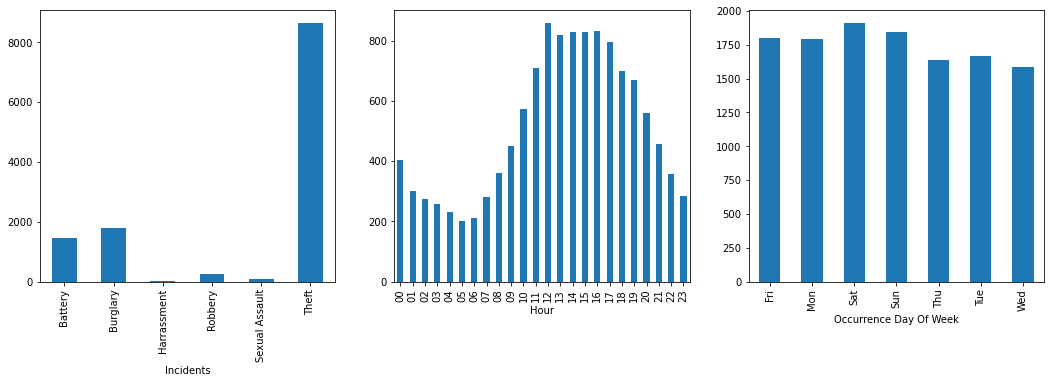

In [273]:
fig, axes=plt.subplots(nrows = 1, ncols = 3,figsize=(18, 5))
for i in range(3):
    df[i].plot.bar(ax=axes[i])

In [274]:
df[3].sort_values()

Area Unit
Oratia West.                1
Buckland.                   1
Narrow Neck.                1
Glamorgan.                  1
Muriwai Beach.              1
                         ... 
Henderson South.          244
Auckland Central East.    268
Auckland Harbourside.     327
Manukau Central.          355
Auckland Central West.    818
Name: Number of Victimisations, Length: 383, dtype: int64

In [275]:
n=4
# creat a n*n matrix
matrix = np.random.rand(n, n)

# Convert the matrix to a DataFrame object
matrix = pd.DataFrame(matrix, index=condition_data.columns[:-1], columns=condition_data.columns[:-1])
for i in range(len(matrix)):
    matrix.iloc[i,i]=1
# print Dataframe
print(matrix)


                        Incidents      Hour  Occurrence Day Of Week  Area Unit
Incidents                1.000000  0.719216                0.893925   0.352951
Hour                     0.584313  1.000000                0.857250   0.916577
Occurrence Day Of Week   0.252112  0.312780                1.000000   0.802446
Area Unit                0.501092  0.356892                0.014514   1.000000


In [276]:
weight=[1/5,\
 1/7,\
 1/3,1/3,\
     5,\
         7]
index=0
for j in range(0,len(matrix)-1):
    for i in range(j+1,len(matrix)):
        matrix.iloc[i,j]=weight[index]
        matrix.iloc[j,i]=1/weight[index]
        index+=1
matrix

,Incidents,Hour,Occurrence Day Of Week,Area Unit
Incidents,1.000000,5.000000,7.0,3.000000
Hour,0.200000,1.000000,3.0,0.200000
Occurrence Day Of Week,0.142857,0.333333,1.0,0.142857
Area Unit,0.333333,5.000000,7.0,1.000000


Row normalization and Columns normalization

In [277]:
#Row normalization
col_sums = matrix.sum()
col_normalized=matrix.div(col_sums, axis=1)

# Columns normalization

row_sums = col_normalized.sum(axis=1)
normalized_matirx=row_sums/len(col_normalized)
normalized_matirx=pd.DataFrame(normalized_matirx)
normalized_matirx

,0
Incidents,0.529361
Hour,0.105068
Occurrence Day Of Week,0.050772
Area Unit,0.314798


Maximum eigenvalue method

In [278]:
lamda_omiga=matrix.dot(normalized_matirx)
lamda=lamda_omiga.div(normalized_matirx)/len(lamda_omiga)
lamda=lamda.sum()
lamda

0    4.231934
dtype: float64

Consistency check

In [279]:

n_values = [1, 2, 3, 4, 5, 6, 7, 8, 9]

# RItable
ri_table = pd.DataFrame([
    [0, 0, 0.58, 0.90, 1.12, 1.24, 1.32, 1.41, 1.45],
    [0, 0, 0, 0.58, 0.90, 1.12, 1.24, 1.32, 1.41],
    [0.58, 0, 0, 0.58, 0.90, 1.12, 1.24, 1.32, 1.41],
    [0.90, 0.58, 0.58, 0, 0.58, 0.90, 1.12, 1.24, 1.32],
    [1.12, 0.90, 0.90, 0.58, 0, 0.58, 0.90, 1.12, 1.24],
    [1.24, 1.12, 1.12, 0.90, 0.58, 0, 0.58, 0.90, 1.12],
    [1.32, 1.24, 1.24, 1.12, 0.90, 0.58, 0, 0.58, 0.90],
    [1.41, 1.32, 1.32, 1.24, 1.12, 0.90, 0.58, 0, 0.58],
    [1.45, 1.41, 1.41, 1.32, 1.24, 1.12, 0.90, 0.58, 0]
], index=n_values, columns=n_values)

print(ri_table)


      1     2     3     4     5     6     7     8     9
1  0.00  0.00  0.58  0.90  1.12  1.24  1.32  1.41  1.45
2  0.00  0.00  0.00  0.58  0.90  1.12  1.24  1.32  1.41
3  0.58  0.00  0.00  0.58  0.90  1.12  1.24  1.32  1.41
4  0.90  0.58  0.58  0.00  0.58  0.90  1.12  1.24  1.32
5  1.12  0.90  0.90  0.58  0.00  0.58  0.90  1.12  1.24
6  1.24  1.12  1.12  0.90  0.58  0.00  0.58  0.90  1.12
7  1.32  1.24  1.24  1.12  0.90  0.58  0.00  0.58  0.90
8  1.41  1.32  1.32  1.24  1.12  0.90  0.58  0.00  0.58
9  1.45  1.41  1.41  1.32  1.24  1.12  0.90  0.58  0.00


In [280]:
omiga_2=normalized_matirx
n=len(matrix)
CI=(lamda-n)/(n-1)
RI=0.9
CR=CI/RI
print(CR)

0    0.085901
dtype: float64


In [281]:
CR<0.1

0    True
dtype: bool

final score

In [282]:
factor_score=pd.DataFrame({'score':[7,3,1,5]},index=omiga_2.index)
score=pd.Series(map(lambda x,y: x*y,factor_score.values,omiga_2.values))
score=pd.DataFrame(score,columns=['weight score'])
score.index=omiga_2.index
score

,weight score
Incidents,[3.7055300489414265]
Hour,[0.3152045806360822]
Occurrence Day Of Week,[0.050772332457703975]
Area Unit,[1.5739901921693717]


In [283]:
def generate_weights(series):
    scaler = MinMaxScaler(feature_range=(1, 10))  # Define the feature range from 1 to 10
    normalized_values = scaler.fit_transform(series.values.reshape(-1, 1))  # Convert the Series to a 2D array and normalize it
    weights = normalized_values.flatten().astype(int)  # Convert the normalized values to an integer list
    return weights

In [284]:
df_weight = [generate_weights(i) for i in df]
df_weight[0]=11-df_weight[0]
print(df_weight)

[array([ 9,  9, 10, 10, 10,  1]), array([ 3,  2,  2,  1,  1,  1,  1,  2,  3,  4,  6,  7, 10,  9,  9,  9,  9,
        9,  7,  7,  5,  4,  3,  2]), array([ 6,  6, 10,  8,  2,  3,  1]), array([ 1,  1,  2,  1,  1,  1,  1,  1,  1,  3, 10,  4,  1,  1,  1,  1,  2,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  3,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  3,  1,
        1,  1,  1,  2,  1,  1,  4,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, 

In [285]:
def min_max_normalize(series, min_range, max_range):
    min_value = series.min()
    max_value = series.max()
    normalized_series = (series - min_value) / (max_value - min_value)
    normalized_series_sum = normalized_series.sum()
    normalized_series = normalized_series / normalized_series_sum * (max_range - min_range) + min_range
    return normalized_series

In [286]:
score['weight score']=min_max_normalize(score['weight score'],0,1)
score['weight score']

Incidents                  [0.6715332320587823]
Hour                      [0.04858736366542049]
Occurrence Day Of Week                    [0.0]
Area Unit                 [0.27987940427579716]
Name: weight score, dtype: object

In [287]:
df=df[:-1]

In [288]:
for i in range(len(df)):
    df[i]=df[i].astype(float).round(2)
    for j in range(len(df[i])):
        df[i][j]=df_weight[i][j]*score['weight score'][i]

In [289]:
# Specify the path and filename for saving the file
filename = 'weight_list.pkl'

# Open the file and use the pickle.dump() method to save the list to the file
with open(filename, 'wb') as f:
    pickle.dump(df, f)

In [359]:
data=pd.read_csv('/Users/zhukang/Desktop/processed_incident_0529.csv')
data=data.drop(data[data['Hour'] == '0:00 am'].index[0])

In [360]:
data['hour']=pd.to_datetime(data.Hour,format='%I:%M %p').dt.strftime('%H')

In [361]:
data

,Hour,Occurrence Day Of Week,Incidents,Area Unit,Date,Number of Victimisations,Latitude,Longitude,Severity Score,hour
0,5:00 am,Thu,Burglary,Millhouse,2022-12-01,1,-36.925371,174.915573,4.4,05
1,1:00 am,Thu,Burglary,Leabank,2022-12-01,1,-37.033954,174.896876,2.8,01
2,5:00 pm,Thu,Theft,Henderson North,2022-12-01,1,-36.884160,174.644419,0.1,17
3,7:00 pm,Thu,Theft,Target Road,2022-12-01,1,-36.767485,174.738526,4.1,19
4,2:00 pm,Thu,Battery,Weymouth East,2022-12-01,1,-37.039029,174.870390,3.8,14
...,...,...,...,...,...,...,...,...,...,...
11243,10:00 pm,Fri,Theft,Wellsford,2023-02-24,1,-36.291415,174.521199,6.5,22
11244,3:00 am,Fri,Burglary,Hauraki,2023-02-24,1,-36.797142,174.777713,6.3,03
11245,10:00 am,Sun,Battery,Drury,2023-03-26,1,-37.099221,174.951965,6.1,10
11246,10:00 am,Sun,Battery,Tamaki,2023-04-09,1,-36.898156,174.857464,8.4,10


In [362]:
df

[Incidents
 Battery           6.043799
 Burglary          6.043799
 Harrassment       6.715332
 Robbery           6.715332
 Sexual Assault    6.715332
 Theft             0.671533
 Name: Number of Victimisations, dtype: float64,
 Hour
 00    0.145762
 01    0.097175
 02    0.097175
 03    0.048587
 04    0.048587
 05    0.048587
 06    0.048587
 07    0.097175
 08    0.145762
 09    0.194349
 10    0.291524
 11    0.340112
 12    0.485874
 13    0.437286
 14    0.437286
 15    0.437286
 16    0.437286
 17    0.437286
 18    0.340112
 19    0.340112
 20    0.242937
 21    0.194349
 22    0.145762
 23    0.097175
 Name: Number of Victimisations, dtype: float64,
 Occurrence Day Of Week
 Fri    0.0
 Mon    0.0
 Sat    0.0
 Sun    0.0
 Thu    0.0
 Tue    0.0
 Wed    0.0
 Name: Number of Victimisations, dtype: float64,
 Area Unit
 Abbotts Park    0.279879
 Akarana         0.279879
 Albany          0.559759
 Ambury          0.279879
 Aorere          0.279879
                   ...   
 Windy Ri

In [363]:
df[3].index = df[3].index.str.rstrip('.')

In [366]:
def Calculate(data):
    try:
        return (df[0][data['Incidents']]+df[1][data['hour']]+\
            df[2][data['Occurrence Day Of Week']]+df[3][data['Area Unit']])
    except:
        return (max(df[0])+df[1][data['hour']]+\
            df[2][data['Occurrence Day Of Week']]+df[3][data['Area Unit']])

In [367]:
data['Severity Score']=data.apply(Calculate,axis=1)

In [368]:
data2=pd.read_csv('/Users/zhukang/final_filtered_keywords.csv')

In [369]:
data2['Severity Score']=data.apply(Calculate,axis=1)

In [370]:
data2.Hour=data2.Hour.str.lower()

In [371]:
data2

,Hour,Occurrence Day Of Week,Incident,Area Unit,Date,Comments,Forward,Like,Number of Victimisations,Latitude,Longitude,Severity Score
0,04:41 pm,Sun,Battery,Auckland Central West,2023-05-28,0,0,0,1,-36.853823,174.759107,6.372266
1,04:36 pm,Sun,Battery,Auckland Central West,2023-05-28,0,0,1,1,-36.853823,174.759107,6.420853
2,04:30 pm,Sun,Battery,Auckland Central West,2023-05-28,1,0,0,1,-36.853823,174.759107,1.388699
3,04:06 pm,Sun,Battery,Auckland Central West,2023-05-28,0,0,0,1,-36.853823,174.759107,1.291524
4,04:00 pm,Sun,Battery,Auckland Central West,2023-05-28,1,0,0,1,-36.853823,174.759107,6.760965
...,...,...,...,...,...,...,...,...,...,...,...,...
1054,01:00 am,Mon,Landslide,Turanga,2022-05-16,0,0,0,1,-36.942255,174.971636,1.388699
1055,09:38 pm,Thu,Landslide,Swanson South,2022-10-20,0,1,2,1,-36.883994,174.575576,2.131162
1056,03:14 am,Sun,Landslide,Swanson South,2022-10-16,1,0,2,1,-36.883994,174.575576,2.228337
1057,05:25 am,Tue,Landslide,Swanson South,2022-10-11,0,0,0,1,-36.883994,174.575576,1.474229


In [378]:
data=data[data.columns[:-1]]
data

,Hour,Occurrence Day Of Week,Incidents,Area Unit,Date,Number of Victimisations,Latitude,Longitude,Severity Score
0,5:00 am,Thu,Burglary,Millhouse,2022-12-01,1,-36.925371,174.915573,6.372266
1,1:00 am,Thu,Burglary,Leabank,2022-12-01,1,-37.033954,174.896876,6.420853
2,5:00 pm,Thu,Theft,Henderson North,2022-12-01,1,-36.884160,174.644419,1.388699
3,7:00 pm,Thu,Theft,Target Road,2022-12-01,1,-36.767485,174.738526,1.291524
4,2:00 pm,Thu,Battery,Weymouth East,2022-12-01,1,-37.039029,174.870390,6.760965
...,...,...,...,...,...,...,...,...,...
11243,10:00 pm,Fri,Theft,Wellsford,2023-02-24,1,-36.291415,174.521199,1.097175
11244,3:00 am,Fri,Burglary,Hauraki,2023-02-24,1,-36.797142,174.777713,6.372266
11245,10:00 am,Sun,Battery,Drury,2023-03-26,1,-37.099221,174.951965,6.615203
11246,10:00 am,Sun,Battery,Tamaki,2023-04-09,1,-36.898156,174.857464,6.615203


In [379]:
merged_df = pd.concat([data, data], axis=0)

In [385]:
merged_df['Incidents'] = merged_df['Incidents'].replace({'Harrassment': 'Harassment', 'Sexual Assult': 'Sexual Assault'})

In [386]:
merged_df.to_csv('final_csv.csv',index=False)